In [90]:
import calendar
import datetime

import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd


In [91]:
temp = pd.read_csv("./data/dayton.csv")
temp.head()


,Month,Day,Year,Temp
0,1,1,1995,39.0
1,1,2,1995,19.6
2,1,3,1995,20.6
3,1,4,1995,11.3
4,1,5,1995,6.8


Create datetime values

In [92]:
def make_date(row):
    # requires mystery conversion from float to int?!?
    return datetime.datetime(int(row["Year"]), int(row["Month"]), int(row["Day"]))


temp["date"] = temp.apply(make_date, axis=1)
temp.head()

,Month,Day,Year,Temp,date
0,1,1,1995,39.0,1995-01-01
1,1,2,1995,19.6,1995-01-02
2,1,3,1995,20.6,1995-01-03
3,1,4,1995,11.3,1995-01-04
4,1,5,1995,6.8,1995-01-05


Calculate whether a date was the highest or lowest in 2014

In [93]:
def is_highest(group_rows):
    # group_rows should be annual values on a particular month-day combo
    rows = group_rows.sort_values("Year", ascending=False)
    return rows["Temp"].max() == rows["Temp"].values[0]


highest_temps = (
    temp.groupby(["Month", "Day"])
    .apply(is_highest)
    .reset_index()
    .rename(columns={0: "is_2014_highest"})
)


# there's probably a way to do both at once
def is_lowest(group_rows):
    # group_rows should be annual values on a particular month-day combo
    rows = group_rows.sort_values("Year", ascending=False)
    return rows["Temp"].min() == rows["Temp"].values[0]


lowest_temps = (
    temp.groupby(["Month", "Day"])
    .apply(is_lowest)
    .reset_index()
    .rename(columns={0: "is_2014_lowest"})
)

# merge both into main temp data
temp_merged = temp.merge(highest_temps, on=["Month", "Day"])
temp_merged = temp_merged.merge(lowest_temps, on=["Month", "Day"])
temp_merged.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23152\2167490770.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(is_highest)
C:\Users\david\AppData\Local\Temp\ipykernel_23152\2167490770.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(is_lowest)


,Month,Day,Year,Temp,date,is_2014_highest,is_2014_lowest
0,1,1,1995,39.0,1995-01-01,False,False
1,1,2,1995,19.6,1995-01-02,False,False
2,1,3,1995,20.6,1995-01-03,False,True
3,1,4,1995,11.3,1995-01-04,False,False
4,1,5,1995,6.8,1995-01-05,False,False


Basic time series

C:\Users\david\AppData\Local\Temp\ipykernel_23152\2209705429.py:12: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axis.plot(row.date, row.Temp, "ro")
C:\Users\david\AppData\Local\Temp\ipykernel_23152\2209705429.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(labels=month_names)


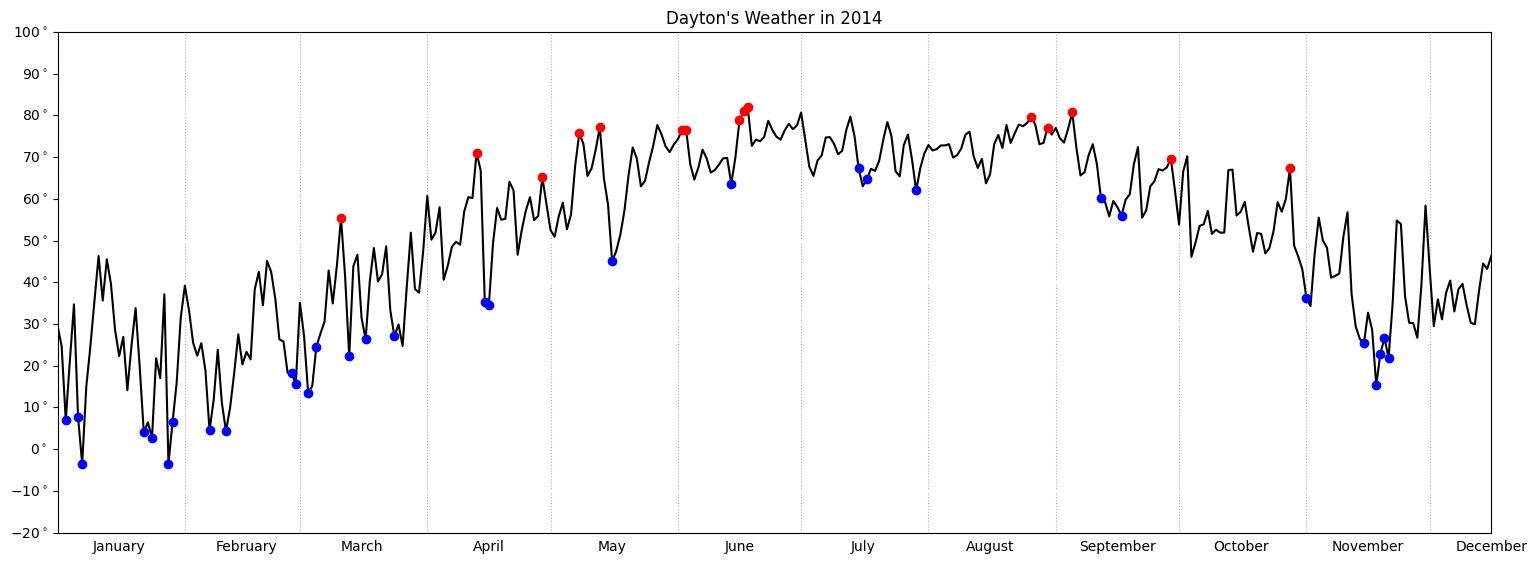

In [94]:
temp2014 = temp[temp["Year"] == 2014].copy()

fig, axis = plt.subplots(figsize=(18.5, 6.5))

# data

# line
temp2014.set_index("date")["Temp"].plot(ax=axis, color="black")

# highest/lowest points
for row in temp_merged[temp_merged["is_2014_highest"]].itertuples():
    axis.plot(row.date, row.Temp, "ro")

for row in temp_merged[temp_merged["is_2014_lowest"]].itertuples():
    axis.plot(row.date, row.Temp, "bo")

# axis labels

axis.set(title="Dayton's Weather in 2014", xlabel=None, ylabel=None, ylim=[-20, 100])

# grid styles
axis.grid(linestyle=":", axis="x")
axis.grid(color="white", axis="y")

# x axis tick labels
axis.xaxis.set_major_locator(dates.MonthLocator())
axis.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))

month_names = [calendar.month_name[m] for m in range(1, 13)]
axis.set_xticklabels(labels=month_names)

axis.xaxis.set_major_formatter(ticker.NullFormatter())
axis.xaxis.set_minor_formatter(dates.DateFormatter("%B"))

axis.tick_params(axis="x", which="both", tick1On=False, tick2On=False)

# y axis tick labels

axis.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
axis.yaxis.set_major_formatter(r"{x:.0f}$^\circ$")

fig.savefig("attempted.png")
plt.show()